# Worksheet 1 - Leander Cascorbi
## 1 Simple Random Walk
### 1b



In [4]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
def SRWclosed(p, tmax, L,  N):
    q = 1-p
    X = np.random.rand(N,tmax)
    X[X<p] = 1
    X[X!=1] = -1
    Y = np.zeros((N,tmax))
    for i in range(0, N):
        X[i,0]=1
        for j in range(1, tmax):
            if Y[i,j-1] == 0:
                if X[i, j-1]==-1:
                    Y[i,j]=0
                else:
                    Y[i,j]=1
            elif Y[i,j-1]==L-1:
                if X[i, j-1]==-1:
                    Y[i,j]=L-2
                else:
                    Y[i,j]=L-1
            else:
                Y[i,j]=Y[i,j-1]+X[i, j-1]

    return X, Y




In [6]:
length = 10
timeStep = 100
p=0.6
iterations = 500

S= SRWclosed(p, timeStep, length, iterations)
print(S[1][1, :])

[0. 1. 0. 1. 2. 3. 4. 5. 6. 7. 8. 9. 9. 9. 9. 9. 9. 8. 7. 6. 7. 8. 7. 6.
 5. 4. 3. 2. 3. 4. 3. 2. 3. 4. 3. 2. 3. 4. 3. 2. 3. 4. 5. 4. 5. 6. 7. 8.
 9. 8. 9. 9. 8. 7. 8. 9. 8. 7. 6. 7. 8. 7. 8. 9. 9. 9. 9. 9. 8. 9. 8. 7.
 8. 7. 6. 5. 4. 3. 2. 1. 0. 0. 1. 2. 3. 4. 5. 4. 5. 6. 5. 6. 7. 6. 5. 4.
 3. 4. 5. 6.]


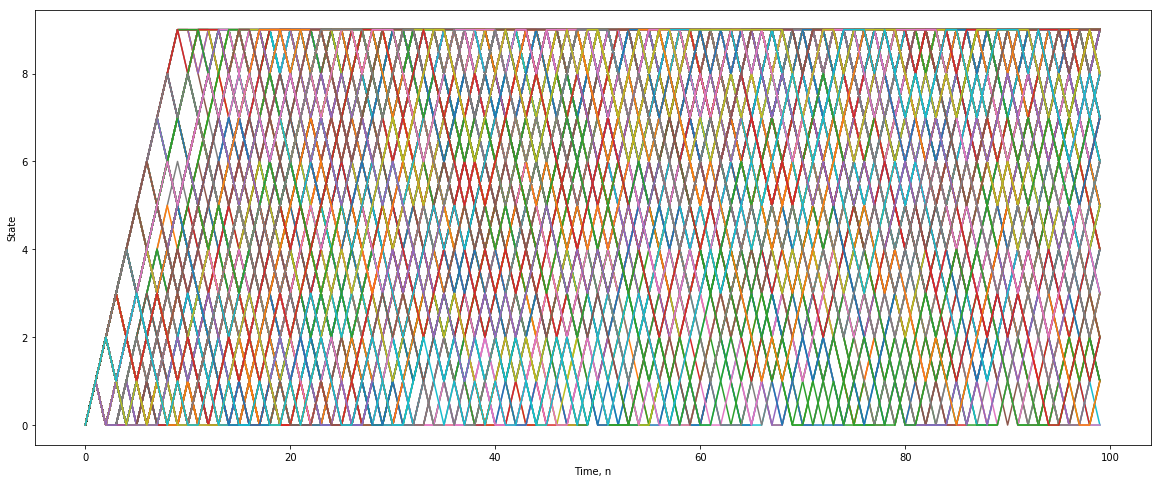

In [7]:
plt.figure(figsize = (20,8))
for k in range(0, iterations):
    plt.plot(range(timeStep), S[1][k,:])
    plt.xlabel('Time, n')
    plt.ylabel('State')

In [8]:
average = np.mean(S[1], axis = 0)
std = np.std(S[1], axis = 0)


# THeory Missing

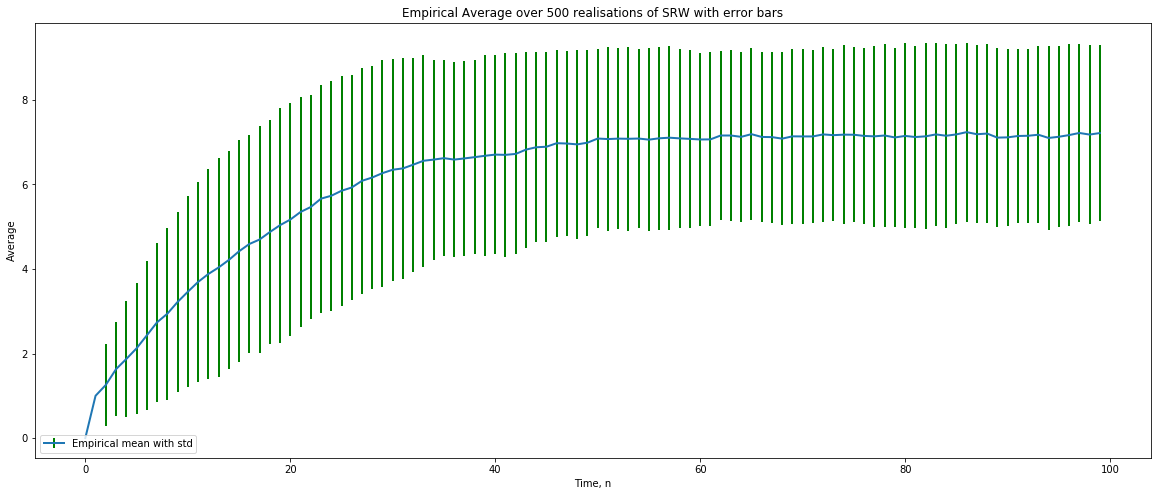

In [9]:
plt.figure(figsize = (20,8))
plt.errorbar(range(timeStep), average, yerr = std, ecolor = 'green',  linewidth = 2, label = "Empirical mean with std")
plt.title("Empirical Average over {} realisations of SRW with error bars".format(iterations))
plt.xlabel("Time, n")
plt.ylabel("Average")
plt.legend(loc = 'lower left')
plt.savefig('empirical.pdf')

/home/rcascorbi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/rcascorbi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


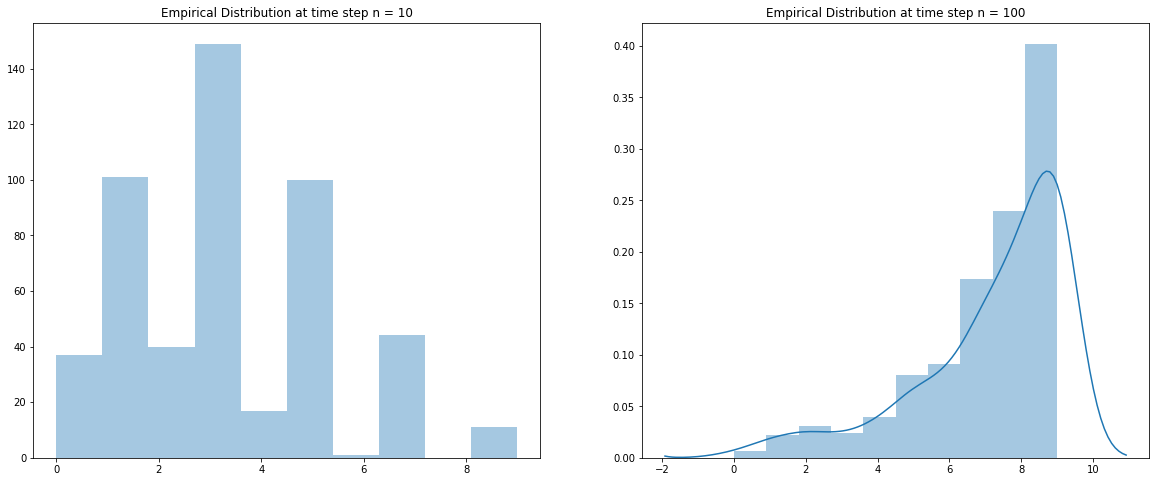

In [10]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.distplot(S[1][:,9],bins = length, kde = False)
plt.title('Empirical Distribution at time step n = 10')

plt.subplot(1,2,2)
plt.title('Empirical Distribution at time step n = 100')
sns.distplot(S[1][:,99],bins = length)


/home/rcascorbi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


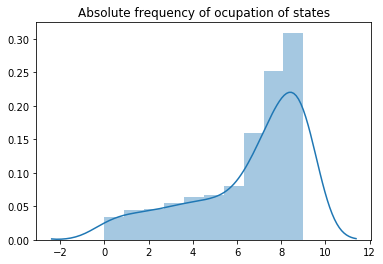

In [11]:
S_single= SRWclosed(p, 500, length, 1)

plt.title('Absolute frequency of ocupation of states')
sns.distplot(S_single[1][0,:],bins = length)

## 2 Geometric Random Walk
### 2d


In [29]:
def RWnormal(μ, σ, tmax,  N):
    X = np.random.randn(N, tmax)*σ+μ
    X[:,0] = 0 
    Y = np.zeros((N, tmax))
    for i in range(0, N):
        Y[i,:]=np.cumsum(X[i,:])
        
    Z = np.exp(Y)

       
    return X, Y, Z


In [41]:
# parameters
μ1 = 0
σ1 = 0.2
timeStep1 = 100
iter=500
SZ=RWnormal(μ1, σ1, timeStep1, iter)

(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 <a list of 7 Text yticklabel objects>)

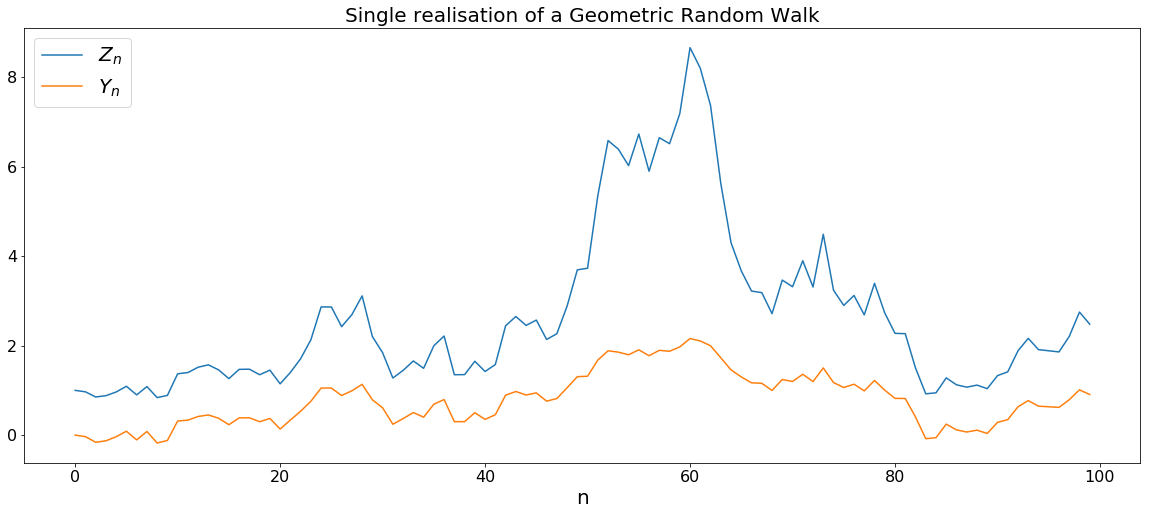

In [42]:
plt.figure(figsize = (20,8))
plt.plot(range(tmax), SZ[2][1,:], label = r'$Z_n$')
plt.plot(range(tmax), SZ[1][1,:], label = r'$Y_n$')
plt.title('Single realisation of a Geometric Random Walk', fontsize =20)
plt.xlabel('n', fontsize = 20)
plt.legend(loc = 'upper left', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

In [43]:
empAve=np.mean(SZ[2], axis = 0)
empStd = np.std(SZ[2], axis = 0)

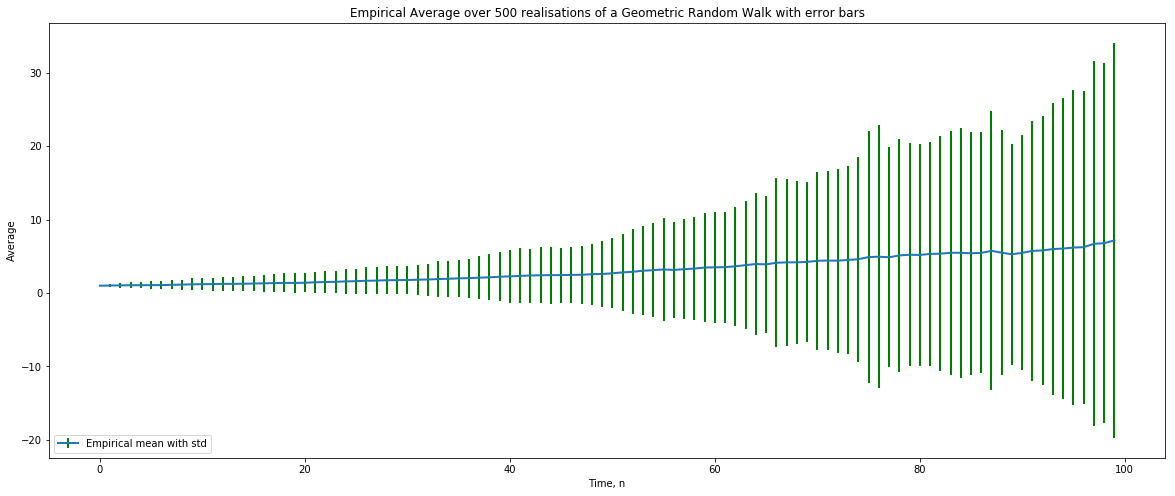

In [45]:
plt.figure(figsize = (20,8))
plt.errorbar(range(timeStep1), empAve, yerr = empStd, ecolor = 'green',  linewidth = 2, label = "Empirical mean with std")
plt.title("Empirical Average over {} realisations of a Geometric Random Walk with error bars".format(iter))
plt.xlabel("Time, n")
plt.ylabel("Average")
plt.legend(loc = 'lower left')
plt.savefig('empirical1.pdf')

# Boxplots missing

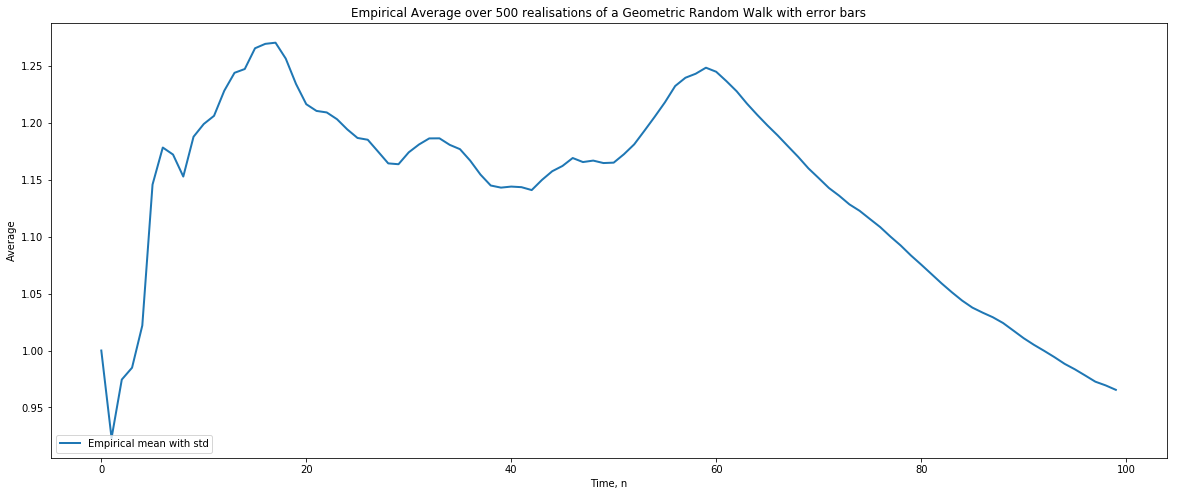

In [65]:
def getErg(series, tmax):
    ave=np.zeros(tmax)
    for i in range(0, tmax):
        ave[i]=np.average(series[0:i+1])
    return ave
    
ergValues= getErg(SZ[2][2,:], timeStep1)

plt.figure(figsize = (20,8))
plt.errorbar(range(timeStep1), ergValues, ecolor = 'green',  linewidth = 2, label = "Empirical mean with std")
plt.title("Empirical Average over {} realisations of a Geometric Random Walk with error bars".format(iter))
plt.xlabel("Time, n")
plt.ylabel("Average")
plt.legend(loc = 'lower left')